In [1]:
!pip install lifelines
!pip install pycox
!pip install xgbse
!pip install optuna
!pip install shap
!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 5.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=beda90e352988a44348c9a5af63c313bc57a695f5e59d7ffe374ccd35dc5dc43
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/13

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
datapath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/'


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               773 non-null    int64  
 1   NAC              773 non-null    int64  
 2   Pre_WBC          773 non-null    object 
 3   Pre_Neu          773 non-null    object 
 4   Pre_Lym          773 non-null    object 
 5   Pre_Plt          773 non-null    object 
 6   Pre_Hb           773 non-null    object 
 7   Pre_Crp          773 non-null    object 
 8   Pre_alb          773 non-null    object 
 9   Pre_cr           773 non-null    object 
 10  Pre_GFR          773 non-null    object 
 11  Pre_CO           773 non-null    object 
 12  Age              773 non-null    int64  
 13  Female           773 non-null    int64  
 14  BMI              773 non-null    float64
 15  DM               773 non-null    int64  
 16  HTN              773 non-null    int64  
 17  Location_Pelvis 

In [9]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B'],
      dtype='object')

In [10]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True)
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True)
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True)
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True)
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True)
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True)
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True)
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True)
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True)
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True)
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True)
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True)
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True)
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True)
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True)
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True)
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True)
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True)
data['RFS_B'] = data['RFS_B'].astype(float)

In [11]:
data.describe()

,ID,NAC,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,...,path_T,Path_N,Path_Grade,Path_CIS,OS,Surv,Prg,PFS,REC_B,RFS_B
count,773.000000,773.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,773.000000,340.000000,739.000000,760.000000,771.000000,773.000000,678.000000,678.000000,771.000000,711.000000
mean,388.930142,0.080207,6902.072539,60.067098,28.985751,234504.663212,12.731088,0.772396,3.827474,1.133623,...,3.610608,0.314706,0.852503,0.411842,0.273671,41.652005,0.268437,40.839233,0.363165,28.901547
std,225.274180,0.271789,5171.968329,10.897472,9.366921,68376.647655,1.934315,2.215891,0.608109,0.604217,...,1.349435,0.668125,0.354840,0.492491,0.446131,28.560984,0.443473,30.796456,0.717421,26.689057
min,1.000000,0.000000,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,2.400000,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,0.000000,5300.000000,53.000000,22.775000,191750.000000,11.600000,0.100000,3.600000,0.850000,...,2.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,13.000000,0.000000,7.000000
50%,387.000000,0.000000,6300.000000,60.400000,28.600000,231000.000000,12.900000,0.140000,3.800000,1.020000,...,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,35.000000,0.000000,19.000000
75%,584.000000,0.000000,7700.000000,67.000000,35.400000,273000.000000,14.100000,0.370000,4.100000,1.260000,...,5.000000,0.000000,1.000000,1.000000,1.000000,60.000000,1.000000,61.000000,1.000000,43.000000
max,778.000000,1.000000,118000.000000,110.400000,78.100000,590000.000000,17.500000,26.790000,16.000000,8.400000,...,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000,9.000000,118.000000


In [12]:
data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [13]:
raw = data

In [14]:
import xgboost as xgb

## 1. Data preprocessing & Missing value exploration

In [15]:
pip install tableone

In [16]:
from tableone import TableOne

In [17]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [18]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS', 'OS', 'Surv']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [19]:
meta = data.dropna(subset=['Prg','PFS','OS', 'Surv'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [20]:
meta['HTN'].replace({2:1},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass
<ipython-input-20-2e705e4e6b0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['HTN'].replace({2:1},inplace=True)


In [21]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [22]:
table1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


Missing             Overall
n                                                        677
Pre_WBC, mean (SD)                     0     6956.4 (5467.3)
Pre_Neu, mean (SD)                     0         60.1 (11.0)
Pre_Lym, mean (SD)                     0          29.0 (9.5)
Pre_Plt, mean (SD)                     0  234885.7 (68192.8)
Pre_Hb, mean (SD)                      0          12.7 (1.9)
NAC, n (%)                   0         0          627 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     0           0.8 (2.2)
Pre_alb, mean (SD)                     0           3.8 (0.6)
Pre_cr, mean (SD)                      0           1.1 (0.6)
Pre_GFR, mean (SD)                     0         81.3 (39.7)
Pre_CO, mean (SD)                      1          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          479 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          514 (75.9)
                             1                    163 (24.1)
HTN, n (%)                   0         0          338 (49.9)
                             1                    339 (50.1)
Location_Pelvis, n (%)       0         0          330 (48.7)
                             1                    347 (51.3)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          316 (46.7)
                             1                    361 (53.3)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  545 (84.8)
Path_CIS, n (%)              0.0      13          391 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          495 (73.1)
                             1.0                  182 (26.9)
PFS, mean (SD)                         0         40.9 (30.8)
OS, n (%)                    0.0       0          472 (69.7)
                             1.0                  205 (30.3)
Surv, mean (SD)                        0         45.3 (28.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS, Surv.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [23]:
table1.to_csv(datapath+'/'+'Table1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [25]:
meta.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,...,677.000000,677.000000,677.000000,311.000000,643.000000,664.000000,677.000000,677.000000,677.000000,677.000000
mean,6956.425406,60.096160,28.967061,234885.672083,12.747120,0.073855,0.781226,3.832511,1.121207,81.312922,...,1.205318,0.533235,3.621861,0.321543,0.847589,0.411145,0.268833,40.899557,0.302806,45.261448
std,5467.324204,11.009246,9.484649,68192.760108,1.915441,0.261729,2.222134,0.629972,0.579973,39.669294,...,0.459065,0.499263,1.368062,0.685908,0.359698,0.492412,0.443681,30.779113,0.459812,28.650225
min,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,0.000000,2.400000,0.320000,26.696473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,52.900000,22.700000,193000.000000,11.600000,0.000000,0.100000,3.600000,0.840000,58.601978,...,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,23.000000
50%,6400.000000,60.500000,28.500000,232000.000000,12.900000,0.000000,0.140000,3.800000,1.020000,75.161616,...,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,7700.000000,67.100000,35.100000,272000.000000,14.100000,0.000000,0.390000,4.100000,1.260000,95.403514,...,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,61.000000,1.000000,63.000000
max,118000.000000,110.400000,78.100000,590000.000000,17.500000,1.000000,26.790000,16.000000,8.400000,553.130662,...,4.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000


In [26]:
temp = meta[meta['Prg']==0]
temp[temp['PFS']>60]['PFS'].replace(60)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


0      105.0
1      107.0
4      121.0
5       65.0
7      119.0
       ...  
370     61.0
375     61.0
378     62.0
382     61.0
392     62.0
Name: PFS, Length: 169, dtype: float64

In [27]:
# meta['PFS'] = meta['PFS'].apply(lambda x: 60 if x > 60 else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [28]:
meta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,1,1,3,NaN,0.0,0.0,0.0,105.0,0.0,105
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,1,1,2,NaN,1.0,0.0,0.0,107.0,0.0,107
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,1,0,4,0.0,0.0,0.0,1.0,3.0,1.0,113
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,1,0,5,NaN,1.0,0.0,0.0,9.0,0.0,9
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,1,0,2,NaN,0.0,0.0,0.0,121.0,0.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,2,0,5,NaN,NaN,NaN,1.0,6.0,0.0,18
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,1,0,5,NaN,NaN,NaN,1.0,7.0,0.0,7
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,1,0,3,NaN,NaN,NaN,0.0,18.0,0.0,18
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,1,1,4,NaN,NaN,NaN,1.0,0.0,0.0,22


In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


## data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [30]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [31]:
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [32]:
import optuna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [33]:
print(xgb.__version__)

1.7.6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [34]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors, XGBSEDebiasedBCE,XGBSEStackedWeibull
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


In [35]:
import xgbse

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [36]:
print(xgbse.__version__)

0.2.3


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [37]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [38]:
meta.columns

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [39]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [40]:
anal['PFS'].describe()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


count    627.000000
mean      41.583732
std       30.754629
min        0.000000
25%       14.000000
50%       36.000000
75%       61.000000
max      121.000000
Name: PFS, dtype: float64

In [41]:
anal[anal['Prg']==1]['PFS'].describe()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


count    162.000000
mean      16.913580
std       18.081388
min        0.000000
25%        5.000000
50%       10.000000
75%       23.000000
max      103.000000
Name: PFS, dtype: float64

In [42]:
anal.columns

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [43]:
E= anal[['Prg']]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [44]:
weight = len(E[E==0])/ len(E[E==1])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [45]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [46]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [47]:
# X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]

X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg', 'PFS','OS', 'Surv']]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [48]:
# y = convert_to_structured(anal['PFS'], anal['Prg'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y['Prg'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=7,stratify=y_train['Prg'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [50]:
y_back = convert_to_structured(y['PFS'], y['Prg'])
y_test_back=y_test.copy()
y_train_back=y_train.copy()
y_valid_back=y_valid.copy()
y_test_pfs = convert_to_structured(y_test['PFS'], y_test['Prg'])
y_train_pfs = convert_to_structured(y_train['PFS'], y_train['Prg'])
y_valid_pfs = convert_to_structured(y_valid['PFS'], y_valid['Prg'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [51]:

y_test_os = convert_to_structured(y_test['Surv'], y_test['OS'])
y_train_os = convert_to_structured(y_train['Surv'], y_train['OS'])
y_valid_os = convert_to_structured(y_valid['Surv'], y_valid['OS'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [52]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [53]:
Table_1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [54]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [55]:
Table_1

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,,Missing,Overall
n,,,677
"Pre_WBC, median [Q1,Q3]",,0,"6400.0 [5300.0,7700.0]"
"Pre_Neu, median [Q1,Q3]",,0,"60.5 [52.9,67.1]"
"Pre_Lym, median [Q1,Q3]",,0,"28.5 [22.7,35.1]"
"Pre_Plt, median [Q1,Q3]",,0,"232000.0 [193000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,0,"12.9 [11.6,14.1]"
"NAC, mean (SD)",,0,0.1 (0.3)
"Pre_Crp, median [Q1,Q3]",,0,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,0,"3.8 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,0,"1.0 [0.8,1.3]"


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [56]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [57]:
X_train_v = X_train.values
X_test_v = X_test.values
X_valid_v = X_valid.values


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [58]:
meta.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
meta.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
meta.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [59]:
xgb_train_pfs = convert_data_to_xgb_format(X_train_v,y_train_pfs,'survival:aft')
xgb_valid_pfs = convert_data_to_xgb_format(X_valid_v,y_valid_pfs,'survival:aft')
xgb_test_pfs = convert_data_to_xgb_format(X_test_v,y_test_pfs,'survival:aft')

xgb_train_os = convert_data_to_xgb_format(X_train_v,y_train_os,'survival:aft')
xgb_valid_os = convert_data_to_xgb_format(X_valid_v,y_valid_os,'survival:aft')
xgb_test_os = convert_data_to_xgb_format(X_test_v,y_test_os,'survival:aft')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [60]:
meta[['Prg', 'PFS']]['PFS'].max()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


121.0

In [61]:
TIME_BINS = np.arange(0, 130, 1)
TIME_BINS

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [62]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [63]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):

    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
invalid escape sequence '\g'
invalid escape sequence '\g'
invalid escape sequence '\g'


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [64]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'logistic',
    'aft_loss_distribution_scale': 1,
    'tree_method': 'hist',
    'learning_rate': 5e-2,
    'max_depth': 100,
    # 'booster':'dart',
    'min_child_weight': 5
}

PARAMS_LR = {
    'C': 1e-3,
    'max_iter': 2
}


N_NEIGHBORS = 100


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [65]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [66]:
y_test

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [67]:
E=y_test['Prg']
T=y_test['PFS']

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [68]:
weight = len(E[E==0])/len(E[E==1])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [69]:
weight

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


2.9375

## 1 PFS model

In [70]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(T, E)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 47 right-censored observations>

In [71]:
PARAMS_XGB_AFT

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 100,
 'min_child_weight': 5}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [72]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              # 'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.03,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_pfs, num_boost_round=10000,
                    evals=[(xgb_train_pfs, 'train'), (xgb_valid_pfs, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [73]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10000, timeout=100)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
[I 2023-09-07 07:31:39,485] A new study created in memory with name: no-name-4dac0ca6-5e96-4d81-a790-40f5276fc690
[I 2023-09-07 07:31:39,949] Trial 0 finished with value: 1.8430863065303105 and parameters: {'learning_rate': 0.08034632750243681, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 1.5234956015389658, 'max_depth': 18, 'lambda': 0.07025354580681294, 'alpha': 0.4384817230758978, 'min_child_weight': 4.190390291589187, 'colsample_bynode': 0.932590459043592, 'colsample_bytree': 0.721424025723191, 'colsample_bylevel': 0.967535723759517}. Best is trial 0 with value: 1.8430863065303105.
[I 2023-09-07 07:31:40,173] Trial 1 finished with value: 1.7678971741041953 and parameters: {'learning_rate': 0.06683674567527749, 'aft_loss_dist

Completed hyperparameter tuning with best aft-nloglik = 1.7158715655484464.


In [74]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [75]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
plot_parallel_coordinate(study)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
params_WB = {
    'penalizer':0.001
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'scale_pos_weight': 2.9375,
 'learning_rate': 0.09803130572349032,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.7696983302615227,
 'max_depth': 19,
 'lambda': 0.25547796017532676,
 'alpha': 0.6064037593839068,
 'min_child_weight': 5.422192304044155,
 'colsample_bynode': 0.9458329742152366,
 'colsample_bytree': 0.9246422738518173,
 'colsample_bylevel': 0.9350696426609566}

In [79]:
# %%time
# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model_pfs = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_pfs = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_pfs.fit(X_train, y_train_pfs,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_pfs),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_pfs = XGBSEBootstrapEstimator(xgbse_model_pfs, n_estimators=30)
bootstrap_estimator_pfs.fit(
    X_train,
    y_train_pfs,
    validation_data=(X_test, y_test_pfs),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean_pfs, upper_ci_pfs, lower_ci_pfs = xgbse_model_pfs.predict(X_test, return_ci=True)


# # predicting
mean_pfs, upper_ci_pfs, lower_ci_pfs = bootstrap_estimator_pfs.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_pfs, mean_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_pfs, mean_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_test_pfs, mean_pfs)> 0.05}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.8076398362892224
Avg. Brier Score: 0.11081523220102092
Calibration Score: True


In [80]:
dist_calibration_score(y_test_pfs, mean_pfs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.6293057964999291

In [81]:
xgbse_model_pfs
# bootstrap_estimator_pfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                    xgb_params={'aft_loss_distribution': 'logistic',
                                'aft_loss_distribution_scale': 0.7696983302615227,
                                'alpha': 0.6064037593839068,
                                'colsample_bylevel': 0.9350696426609566,
                                'colsample_bynode': 0.9458329742152366,
                                'colsample_bytree': 0.9246422738518173,
                                'eval_metric': 'aft-nloglik',
                                'lambda': 0.25547796017532676,
                                'learning_rate': 0.09803130572349032,
                                'max_depth': 19,
                                'min_child_weight': 5.422192304044155,
                                'objective': 'survival:aft',
                                'scale_pos_weight': 2.9375, 'verbosity': 0})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



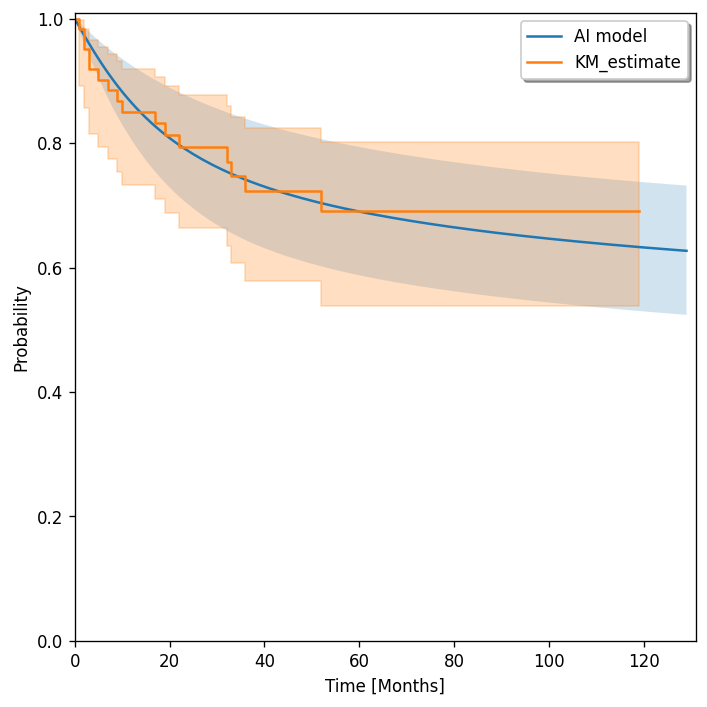

In [82]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_pfs.columns, mean_pfs.mean(), label="AI model")
line2 = ax.fill_between(mean_pfs.columns, lower_ci_pfs.mean(), upper_ci_pfs.mean(), alpha=0.2)


line3 = kmf.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [83]:
mean_pfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
0,1.0,0.998677,0.997868,0.997151,0.996484,0.995850,0.995241,0.994650,0.994075,0.993512,...,0.947407,0.947055,0.946704,0.946354,0.946004,0.945656,0.945308,0.944960,0.944614,0.944269
1,1.0,0.941823,0.881679,0.822853,0.766402,0.712824,0.662347,0.615051,0.570921,0.529880,...,0.017734,0.017543,0.017355,0.017171,0.016989,0.016810,0.016634,0.016461,0.016290,0.016122
2,1.0,0.998845,0.998082,0.997404,0.996773,0.996175,0.995601,0.995046,0.994507,0.993981,...,0.954385,0.954097,0.953811,0.953524,0.953239,0.952954,0.952670,0.952387,0.952105,0.951823
3,1.0,0.980748,0.961455,0.942785,0.924987,0.908169,0.892366,0.877578,0.863780,0.850933,...,0.580923,0.579945,0.578972,0.578005,0.577044,0.576089,0.575139,0.574195,0.573256,0.572323
4,1.0,0.996394,0.993370,0.990509,0.987754,0.985079,0.982470,0.979917,0.977416,0.974961,...,0.821770,0.820926,0.820086,0.819251,0.818421,0.817596,0.816776,0.815960,0.815149,0.814342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.0,0.998359,0.997336,0.996451,0.995646,0.994895,0.994186,0.993510,0.992862,0.992236,...,0.954764,0.954533,0.954303,0.954074,0.953846,0.953619,0.953392,0.953167,0.952943,0.952719
59,1.0,0.998334,0.997427,0.996654,0.995955,0.995306,0.994694,0.994111,0.993553,0.993014,...,0.960013,0.959802,0.959591,0.959382,0.959173,0.958965,0.958758,0.958551,0.958345,0.958140
60,1.0,0.999077,0.998680,0.998350,0.998055,0.997781,0.997523,0.997277,0.997041,0.996813,...,0.980924,0.980812,0.980701,0.980590,0.980479,0.980368,0.980258,0.980148,0.980038,0.979929
61,1.0,0.979253,0.958944,0.938949,0.919339,0.900161,0.881445,0.863209,0.845464,0.828215,...,0.261502,0.260158,0.258830,0.257519,0.256223,0.254943,0.253678,0.252427,0.251192,0.249970


In [84]:
mean_pfs.loc[[29]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
29,1.0,0.986168,0.97368,0.961656,0.949975,0.938589,0.92747,0.916603,0.905977,0.895581,...,0.403378,0.401488,0.399618,0.397765,0.395932,0.394116,0.392318,0.390537,0.388774,0.387028


In [85]:
PRG_test, PFS_test = convert_y(y_test_pfs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [86]:
mean_pfs['PRG_test'] = PRG_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [87]:
mean_pfs['PFS_test'] = PFS_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [88]:
temp = mean_pfs[mean_pfs['PRG_test']==True]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [89]:
temp['PFS_test'].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([ 9.,  3., 19.,  5.,  2., 32., 17.,  1., 22., 36., 10.,  7.,  3.,
       52.,  2., 33.])

In [90]:
# temp['e_proba'] = temp.PFS_test.apply(lambda x: temp[x], print(x))
# temp.PFS_test.apply(lambda x: print(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
dist_calibration_score(y_test_pfs, mean_pfs, returns="all")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'statistic': 7.075049449730243,
 'pval': 0.6293057964999291,
 'max_deviation': 0.8260299674575771,
 'histogram': bin
 (-0.001, 0.1]     6.689913
 (0.1, 0.2]        7.243078
 (0.2, 0.3]        5.727558
 (0.3, 0.4]        7.129834
 (0.4, 0.5]        5.697596
 (0.5, 0.6]        4.524558
 (0.6, 0.7]        4.280920
 (0.7, 0.8]        6.677337
 (0.8, 0.9]        3.525218
 (0.9, 1.0]       11.503989
 dtype: float64}

In [92]:
predicted_surv = mean_pfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
mean_pfs.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.0          1.000000
1.0          0.986412
2.0          0.973187
3.0          0.960262
4.0          0.947737
              ...    
127.0        0.627985
128.0        0.627401
129.0        0.626822
PRG_test     0.253968
PFS_test    41.793651
Length: 132, dtype: float64

In [94]:
from bisect import bisect_right
def _match_times_to_windows(times, windows):
    matches = np.array([bisect_right(windows, e) for e in times])
    matches = np.clip(matches, 0, len(windows) - 1)
    return windows[matches]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [95]:
X_test.loc[29]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [96]:
y_test_back[y_test_back['Prg']==1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [97]:
mean_pfs.set_index(keys =y_test_back.index, inplace=True )
upper_ci_pfs.set_index(keys =y_test_back.index, inplace=True )
lower_ci_pfs.set_index(keys =y_test_back.index, inplace=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_pfs = bootstrap_estimator_pfs.predict(X_train)
print(f"C-index: {concordance_index(y_train_pfs, mean_1_pfs)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.8695115285734529


In [99]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_pfs = bootstrap_estimator_pfs.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_pfs, mean_2_pfs)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.8425324675324676


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



##2. OS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
E_2=y_test['OS']
T_2=y_test['Surv']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [101]:
y_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [102]:
weight_2 = len(E_2[E_2==0])/len(E_2[E_2==1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [103]:
weight_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1.8636363636363635

In [104]:
from lifelines import KaplanMeierFitter
kmf_os = KaplanMeierFitter()

kmf_os.fit(T_2, E_2)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 41 right-censored observations>

In [105]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight_2
              }  # Hyperparameters common to all trials



def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.3,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_os, num_boost_round=10000,
                    evals=[(xgb_train_os, 'train'), (xgb_valid_os, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [106]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout=100)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[I 2023-09-07 07:33:45,033] A new study created in memory with name: no-name-f2bc67c2-fbc1-4f26-abe2-cff69236befe
[I 2023-09-07 07:33:45,455] Trial 0 finished with value: 2.2167304711840465 and parameters: {'learning_rate': 0.006437910789383751, 'aft_loss_distribution': 'normal', 'aft_loss_distribution_scale': 1.830854522055777, 'max_depth': 20, 'lambda': 0.30877082674144485, 'alpha': 0.5953935099279307, 'min_child_weight': 6.648088013242475, 'colsample_bynode': 0.8890357378249217, 'colsample_bytree': 0.9850360421386428, 'colsample_bylevel': 0.9020525451521016}. Best is trial 0 with value: 2.2167304711840465.
[I 2023-09-07 07:33:45,694] Trial 1 finished with value

Completed hyperparameter tuning with best aft-nloglik = 1.9639961312748344.


In [107]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [108]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
plot_parallel_coordinate(study)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[W 2023-09-07 07:35:25,836] Trial 13 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,838] Trial 22 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,839] Trial 28 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,841] Trial 33 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,843] Trial 35 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,844] Trial 42 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-07 07:35:25,8

In [110]:
params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'tree_method': 'hist',
 'scale_pos_weight': 1.8636363636363635,
 'learning_rate': 0.07971773858037365,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.7440834618246496,
 'max_depth': 14,
 'lambda': 0.8731452667649229,
 'alpha': 0.6655495396393611,
 'min_child_weight': 6.1021937444299335,
 'colsample_bynode': 0.8440175037015347,
 'colsample_bytree': 0.8393506531401285,
 'colsample_bylevel': 0.8335194811704457}

In [111]:
# %%time

# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_os = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_os.fit(X_train, y_train_os,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_os),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_os = XGBSEBootstrapEstimator(xgbse_model_os, n_estimators=30)
bootstrap_estimator_os.fit(
    X_train,
    y_train_os,
    validation_data=(X_test, y_test_os),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean, upper_ci, lower_ci = xgbse_model.predict(X_test, return_ci=True)


# # predicting
mean_os, upper_ci_os, lower_ci_os = bootstrap_estimator_os.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_os, mean_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_os, mean_os)}")
print(f"Calibration Score: {dist_calibration_score(y_test_os, mean_os)> 0.05}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.8176795580110497
Avg. Brier Score: 0.10952429527180634
Calibration Score: True


In [112]:
dist_calibration_score(y_test_os, mean_os)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.6136946999081798

In [113]:
bootstrap_estimator_os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



XGBSEBootstrapEstimator(base_estimator=XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                                                           xgb_params={'aft_loss_distribution': 'logistic',
                                                                       'aft_loss_distribution_scale': 0.7440834618246496,
                                                                       'alpha': 0.6655495396393611,
                                                                       'colsample_bylevel': 0.8335194811704457,
                                                                       'colsample_bynode': 0.8440175037015347,
                                                                       'colsample_bytree': 0.8393506531401285,
                                                                       'eval_metric': 'aft-nloglik',
                                                                       'lambda': 0.8731452667649229,
                                                                       'learning_rate': 0.07971773858037365,
                                                                       'max_depth': 14,
                                                                       'min_child_weight': 6.1021937444299335,
                                                                       'objective': 'survival:aft',
                                                                       'scale_pos_weight': 1.8636363636363635,
                                                                       'tree_method': 'hist',
                                                                       'verbosity': 0}),
                        n_estimators=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



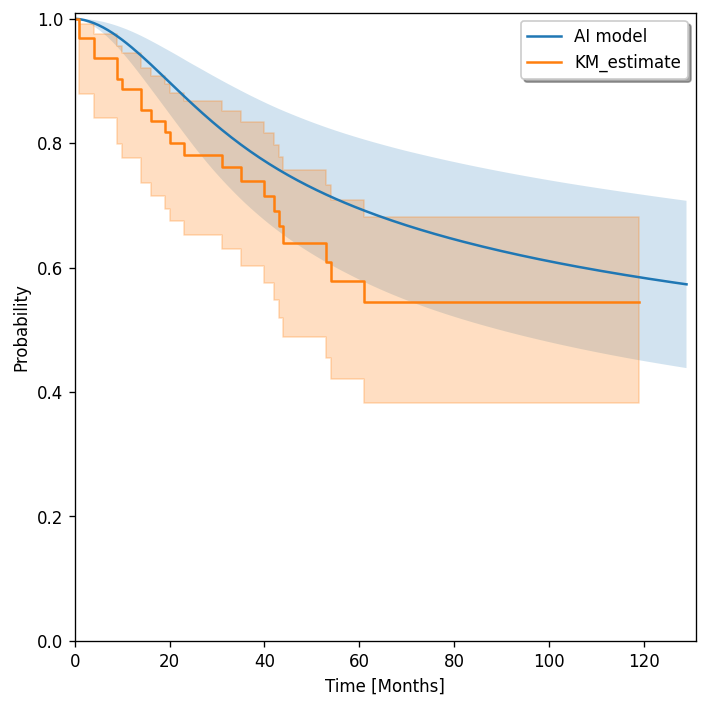

In [114]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_os.columns, mean_os.mean(), label="AI model")
line2 = ax.fill_between(mean_os.columns, lower_ci_os.mean(), upper_ci_os.mean(), alpha=0.2)


line3 = kmf_os.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [115]:
dist_calibration_score(y_test_os, mean_os, returns="all")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'statistic': 7.225112058243906,
 'pval': 0.6136946999081798,
 'max_deviation': 0.6514176738004627,
 'histogram': bin
 (-0.001, 0.1]     4.830954
 (0.1, 0.2]        5.830954
 (0.2, 0.3]        5.830954
 (0.3, 0.4]        5.620385
 (0.4, 0.5]        4.435507
 (0.5, 0.6]        6.119051
 (0.6, 0.7]        3.873073
 (0.7, 0.8]        5.763998
 (0.8, 0.9]       10.291193
 (0.9, 1.0]       10.403931
 dtype: float64}

In [116]:
predicted_surv = mean_os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [117]:
mean_os.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.0      1.000000
1.0      0.999318
2.0      0.997879
3.0      0.995772
4.0      0.993053
           ...   
125.0    0.577374
126.0    0.576252
127.0    0.575141
128.0    0.574042
129.0    0.572954
Length: 130, dtype: float64

In [118]:
X_test.loc[29]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [119]:
y_test_back[y_test_back['Prg']==1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [120]:
mean_os.set_index(keys =y_test_back.index, inplace=True )
upper_ci_os.set_index(keys =y_test_back.index, inplace=True )
lower_ci_os.set_index(keys =y_test_back.index, inplace=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [121]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_os = bootstrap_estimator_os.predict(X_train)
print(f"C-index: {concordance_index(y_train_os, mean_1_os)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.8692350149023071


In [122]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_os = bootstrap_estimator_os.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_os, mean_2_os)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.7543103448275862


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



##3. Save

In [123]:
import pickle

# 모델 저장
pickle.dump(bootstrap_estimator_os, open(savepath+'UTUC_CSS.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [124]:

pickle.dump(bootstrap_estimator_pfs, open(savepath+'UTUC_PFS.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [125]:
savepath

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/'

In [126]:
import pickle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [127]:
!pip install lime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ab9f59f10bbdbb4126706c1469e8b7f3b801abc1b3665558813e843ebe1dc095
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [128]:
import lime
import lime.lime_tabular

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [129]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model_pfs = xgb.train(
            params,
            xgb_train_pfs,
            # maximize=True,
            evals= [(xgb_valid_pfs, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'scale_pos_weight': 1.8636363636363635, 'learning_rate': 0.07971773858037365, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.7440834618246496, 'max_depth': 14, 'lambda': 0.8731452667649229, 'alpha': 0.6655495396393611, 'min_child_weight': 6.1021937444299335, 'colsample_bynode': 0.8440175037015347, 'colsample_bytree': 0.8393506531401285, 'colsample_bylevel': 0.8335194811704457}
[0]	eval-aft-nloglik:3.17802
[10]	eval-aft-nloglik:2.11474
[20]	eval-aft-nloglik:1.89620
[30]	eval-aft-nloglik:1.81936
[40]	eval-aft-nloglik:1.78361
[50]	eval-aft-nloglik:1.77920
[60]	eval-aft-nloglik:1.77571
[70]	eval-aft-nloglik:1.77930
[80]	eval-aft-nloglik:1.78345
[90]	eval-aft-nloglik:1.78529
[100]	eval-aft-nloglik:1.78776
[110]	eval-aft-nloglik:1.79311
[120]	eval-aft-nloglik:1.79273
[130]	eval-aft-nloglik:1.79301
[140]	eval-aft-nloglik:1.79829
[150]	

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[155]	eval-aft-nloglik:1.79373


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [130]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model_pfs.predict(xgb_test_pfs).astype(float)
T = meta['PFS'][test_idx]
E = meta['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

C-index: 0.775
Average survival time: 363 Months


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [131]:
preds_2 = xgb_model_pfs.predict(xgb_train_pfs).astype(float)
T_2 = meta['PFS'][train_idx]
E_2 = meta['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model_pfs.predict(xgb_valid_pfs).astype(float)
T_3 = meta['PFS'][valid_idx]
E_3 = meta['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.958256402022959 0.8493589743589743


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [132]:
X.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Age', 'Female', 'BMI', 'Pre_GFR', 'Location_Pelvis',
       'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade',
       'Path_CIS'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<function matplotlib.pyplot.show(close=None, block=None)>

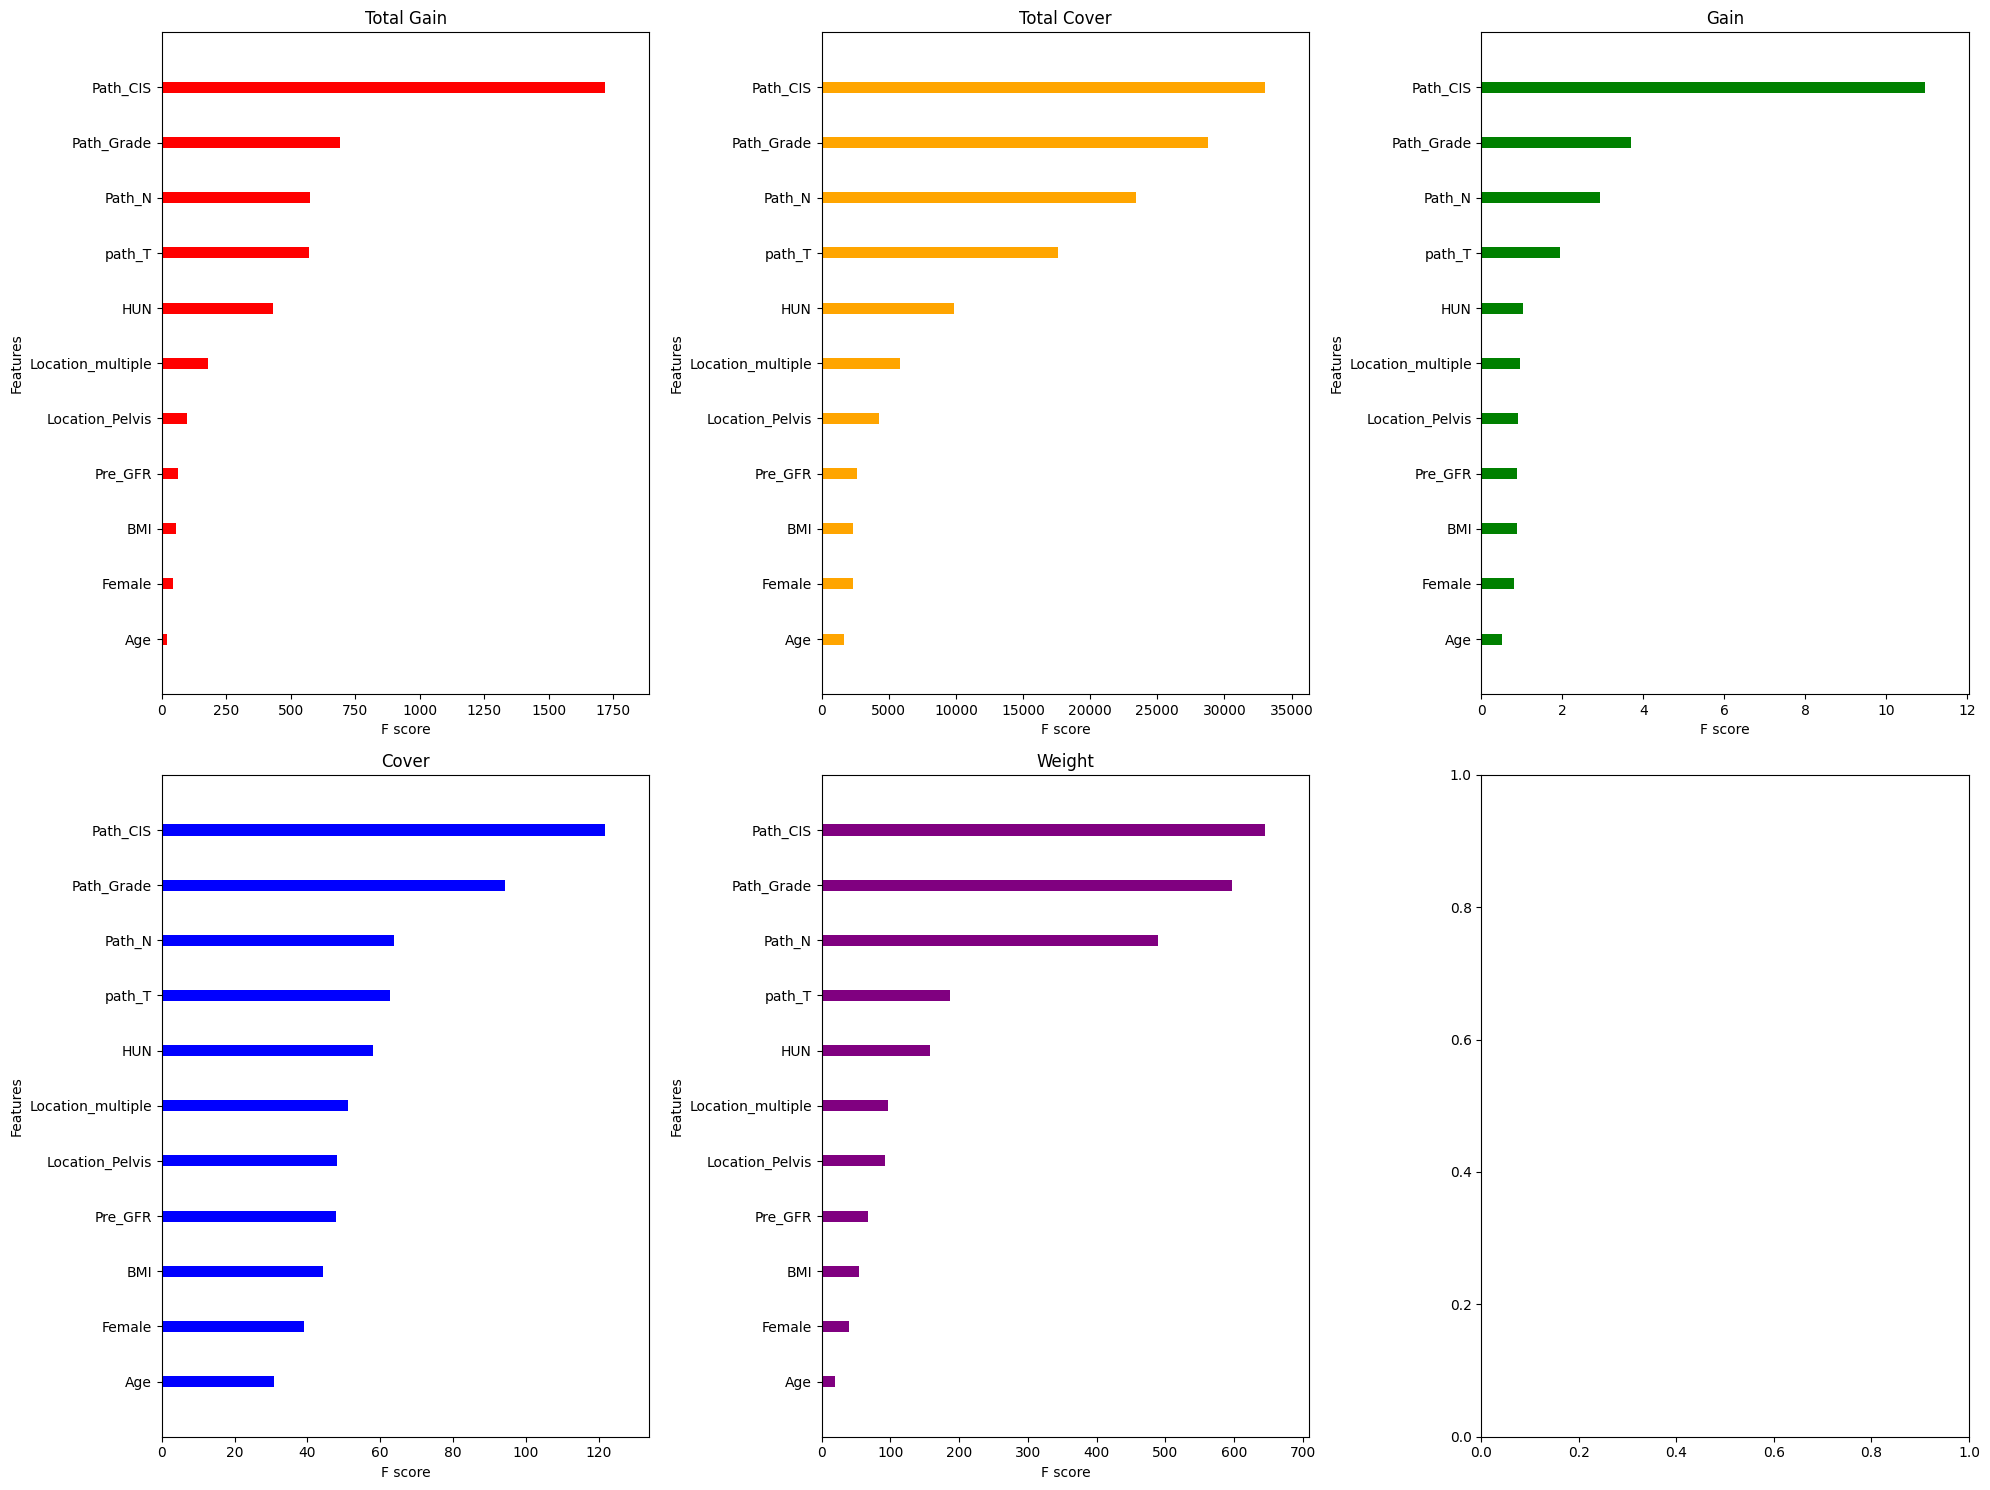

In [133]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model_pfs,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [134]:
import lime
import lime.lime_tabular
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Progression'], verbose=True, mode='regression')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [135]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46
columns = X_train.columns

def xgbse_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=columns)
    return bootstrap_estimator_pfs.predict(data_asframe)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [136]:
import shap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [137]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46

#### Kernel SHAP
shap_kernel_explainer = shap.KernelExplainer(xgbse_predict, X_train.head(30))

# Explain a single instance - output: (1, n_time_buckets, n_features)
shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# Get explanations for the first time bucket
first_time_bucket_shap_values = pd.Series(shap_one[0])

# Print shap values for the first time bucket and the corresponding features
print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



      0                  1
0   0.0                Age
1   0.0             Female
2   0.0                BMI
3   0.0            Pre_GFR
4   0.0    Location_Pelvis
5   0.0  Location_multiple
6   0.0                HUN
7   0.0             path_T
8   0.0             Path_N
9   0.0         Path_Grade
10  0.0           Path_CIS


In [138]:
# shap_one = shap_kernel_explainer.shap_values(X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [139]:

# #### Kernel SHAP


# # Explain a single instance - output: (1, n_time_buckets, n_features)
# shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# # Get explanations for the first time bucket
# first_time_bucket_shap_values = pd.Series(shap_one[0])

# # Print shap values for the first time bucket and the corresponding features
# print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [140]:
# shap.summary_plot(first_time_bucket_shap_values, X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [141]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))
ext_2 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_Hallym.csv'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [142]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True)
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True)
ext_1['Path_N'].replace({'N2':1},inplace=True)
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True)
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True)
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True)
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True)
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True)
ext_1['OS'] = ext_1['OS'].astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [143]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv','path_T'])
ext_2 = ext_2.dropna(subset=['Prg','PFS','OS', 'Surv',])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [144]:
# X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [145]:
X_snu.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
count,159.000000,159.000000,159.000000,157.000000,159.000000,159.000000,158.000000,159.000000,38.000000,149.000000,159.000000
mean,68.427673,0.289308,24.994969,62.662420,0.452830,0.081761,0.474684,3.358491,0.131579,0.805369,0.333333
std,9.921501,0.454874,3.297483,22.110792,0.499343,0.274866,0.500946,1.346740,0.342570,0.397252,0.472894
min,41.000000,0.000000,18.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,22.950000,48.400000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,0.000000,24.900000,61.200000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,75.000000,1.000000,26.650000,78.600000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000
max,93.000000,1.000000,40.900000,120.800000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [146]:
# X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade']]
X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade',"Path_CIS"]]
y_Hallym = ext_1[['Prg', 'PFS','OS', 'Surv']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [147]:

# mean_snu, upper_ci_snu, lower_ci_snu = bootstrap_estimator_pfs.predict(X_snu.iloc[[0]], return_ci=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [148]:
y_snu_anal_pfs = convert_to_structured(y_snu['PFS'], y_snu['Prg'])
y_snu_anal_os = convert_to_structured(y_snu['Surv'], y_snu['OS'])

y_Hallym_anal_pfs = convert_to_structured(y_Hallym['PFS'], y_Hallym['Prg'])
y_Hallym_anal_os = convert_to_structured(y_Hallym['Surv'], y_Hallym['OS'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [149]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_snu_pfs, upper_ci_snu_pfs, lower_ci_snu_pfs = bootstrap_estimator_pfs.predict(X_snu, return_ci=True)
mean_snu_os, upper_ci_snu_os, lower_ci_snu_os = bootstrap_estimator_os.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.7012578616352201
Avg. Brier Score: 0.016779855967931172
Calibration Score: True
Calibration Score: 0.9999957996536909


In [150]:
print(f"C-index: {concordance_index(y_snu_anal_os, mean_snu_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_os, mean_snu_os)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)}")

C-index: 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Avg. Brier Score: 0.0015653274644341852
Calibration Score: True
Calibration Score: 0.9999847819635891


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [151]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_Hallym_pfs, upper_ci_Hallym_pfs, lower_ci_Hallym_pfs = bootstrap_estimator_pfs.predict(X_Hallym, return_ci=True)
mean_Hallym_os, upper_ci_Hallym_os, lower_ci_Hallym_os = bootstrap_estimator_os.predict(X_Hallym, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.7012578616352201
Avg. Brier Score: 0.016779855967931172
Calibration Score: True
Calibration Score: 0.9999957996536909


In [152]:
print(f"C-index: {concordance_index(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)}")

C-index: 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Avg. Brier Score: 0.0015653274644341852
Calibration Score: True
Calibration Score: 0.9999847819635891


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [153]:
tt = ext_1['PFS'].max()
print(tt)

31.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [154]:
# mean_snu = mean_snu.loc[:,0:tt]

# upper_ci_snu = upper_ci_snu.loc[:,0:tt]
# lower_ci_snu = lower_ci_snu.loc[:,0:tt]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [155]:
E_snu, T_snu  = convert_y(y_snu_anal_pfs)
E_snu, T_snu  = convert_y(y_snu_anal_pfs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [156]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 159 total observations, 147 right-censored observations>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



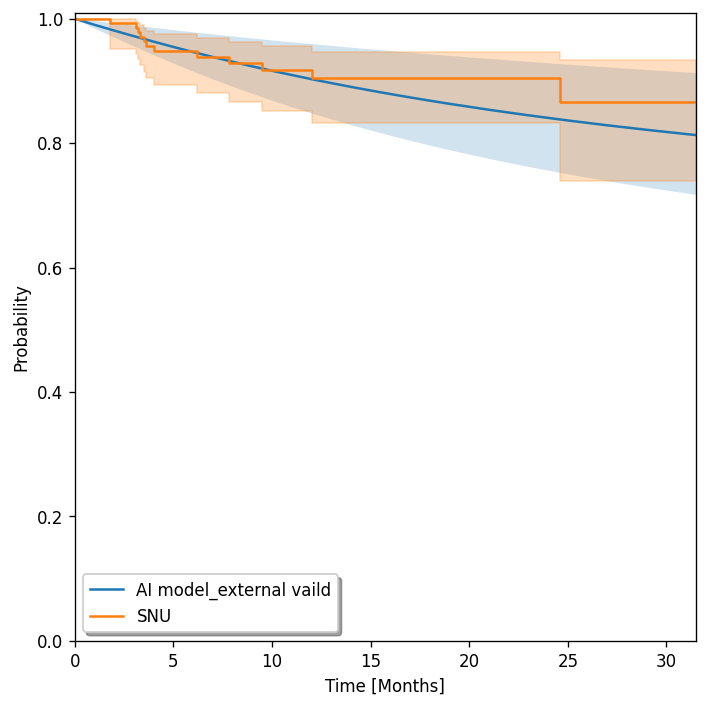

In [157]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_snu_pfs.columns, mean_snu_pfs.mean(), label="AI model_external vaild")
line2 = ax.fill_between(mean_snu_pfs.columns, lower_ci_snu_pfs.mean(), upper_ci_snu_pfs.mean(), alpha=0.2)

line3 = kmf_2.plot_survival_function(label='SNU')
# line4 = kmf_3.plot_survival_function(label='SNU')


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, tt])
plt.ylim([0.0, 1.01])
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Load

In [158]:
!pip install lifelines
!pip install pycox
!pip install xgbse
!pip install optuna
!pip install shap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [159]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [160]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import optuna

from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors, XGBSEDebiasedBCE,XGBSEStackedWeibull
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [161]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [162]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):

    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:2: DeprecationWarning:

invalid escape sequence '\g'

<>:2: DeprecationWarning:

invalid escape sequence '\g'

<ipython-input-162-0cf50b0609fe>:2: DeprecationWarning:

invalid escape sequence '\g'



In [163]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [164]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



Mounted at /content/drive


In [165]:
datapath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [166]:
import pickle

# 모델 저장
bootstrap_estimator_os = pickle.load(open(savepath+'UTUC_CSS.pkl', 'rb'))

bootstrap_estimator_pfs = pickle.load(open(savepath+'UTUC_PFS.pkl', 'rb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [167]:
bootstrap_estimator_os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



XGBSEBootstrapEstimator(base_estimator=XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                                                           xgb_params={'aft_loss_distribution': 'logistic',
                                                                       'aft_loss_distribution_scale': 0.7440834618246496,
                                                                       'alpha': 0.6655495396393611,
                                                                       'colsample_bylevel': 0.8335194811704457,
                                                                       'colsample_bynode': 0.8440175037015347,
                                                                       'colsample_bytree': 0.8393506531401285,
                                                                       'eval_metric': 'aft-nloglik',
                                                                       'lambda': 0.8731452667649229,
                                                                       'learning_rate': 0.07971773858037365,
                                                                       'max_depth': 14,
                                                                       'min_child_weight': 6.1021937444299335,
                                                                       'objective': 'survival:aft',
                                                                       'scale_pos_weight': 1.8636363636363635,
                                                                       'tree_method': 'hist',
                                                                       'verbosity': 0}),
                        n_estimators=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [168]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [169]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True)
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True)
ext_1['Path_N'].replace({'N2':1},inplace=True)
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True)
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True)
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True)
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True)
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True)
ext_1['OS'] = ext_1['OS'].astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [170]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv','path_T'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [171]:
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [172]:
X_snu.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
count,159.000000,159.000000,159.000000,157.000000,159.000000,159.000000,158.000000,159.000000,38.000000,149.000000,159.000000
mean,68.427673,0.289308,24.994969,62.662420,0.452830,0.081761,0.474684,3.358491,0.131579,0.805369,0.333333
std,9.921501,0.454874,3.297483,22.110792,0.499343,0.274866,0.500946,1.346740,0.342570,0.397252,0.472894
min,41.000000,0.000000,18.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,22.950000,48.400000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,0.000000,24.900000,61.200000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,75.000000,1.000000,26.650000,78.600000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000
max,93.000000,1.000000,40.900000,120.800000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [173]:

# mean_snu, upper_ci_snu, lower_ci_snu = bootstrap_estimator_pfs.predict(X_snu.iloc[[0]], return_ci=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [174]:
y_snu_anal_pfs = convert_to_structured(y_snu['PFS'], y_snu['Prg'])
y_snu_anal_os = convert_to_structured(y_snu['Surv'], y_snu['OS'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [175]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_snu_pfs, upper_ci_snu_pfs, lower_ci_snu_pfs = bootstrap_estimator_pfs.predict(X_snu, return_ci=True)
mean_snu_os, upper_ci_snu_os, lower_ci_snu_os = bootstrap_estimator_os.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C-index: 0.7012578616352201
Avg. Brier Score: 0.016779855967931172
Calibration Score: True
Calibration Score: 0.9999957996536909


In [176]:
print(f"C-index: {concordance_index(y_snu_anal_os, mean_snu_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_os, mean_snu_os)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)}")

C-index: 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Avg. Brier Score: 0.0015653274644341852
Calibration Score: True
Calibration Score: 0.9999847819635891


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [177]:
tt = ext_1['PFS'].max()
print(tt)

31.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [178]:
# mean_snu = mean_snu.loc[:,0:tt]

# upper_ci_snu = upper_ci_snu.loc[:,0:tt]
# lower_ci_snu = lower_ci_snu.loc[:,0:tt]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [179]:
E_snu, T_snu  = convert_y(y_snu_anal_pfs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [180]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 159 total observations, 147 right-censored observations>

In [181]:
# from lifelines.statistics import logrank_test
# fig = plt.figure(figsize=(6, 6), dpi=120)
# ax = fig.add_subplot(1, 1, 1)

# # fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# # plt.figure(figsize=(6, 6), dpi=120)



# line1, = ax.plot(mean_snu.columns, mean_snu.mean(), label="AI model_external vaild")
# line2 = ax.fill_between(mean_snu.columns, lower_ci_snu.mean(), upper_ci_snu.mean(), alpha=0.2)

# line3 = kmf_2.plot_survival_function(label='SNU')


# # results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


# ax.legend(shadow=True)


# plt.xlabel('Time [Months]')
# plt.ylabel('Probability')
# plt.xlim([-0.01, tt])
# plt.ylim([0.0, 1.01])
# plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

